# 뉴럴네트워크 다중분류(mnist - 흑백이미지)

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf

##1.데이터 준비

In [60]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [61]:
# 이미지기 때문에 쉐입이 다름
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

##2.데이터 정보

In [62]:
samples = np.random.randint(60000, size = 25)
samples

array([13588, 17954, 46628, 57882, 14386, 15896, 48189, 27735, 26710, 55241, 49075, 19465,  4478, 43653, 56161,  3916, 34809, 32801, 38157,  4441, 11852,  5556, 27049, 33288, 32187])

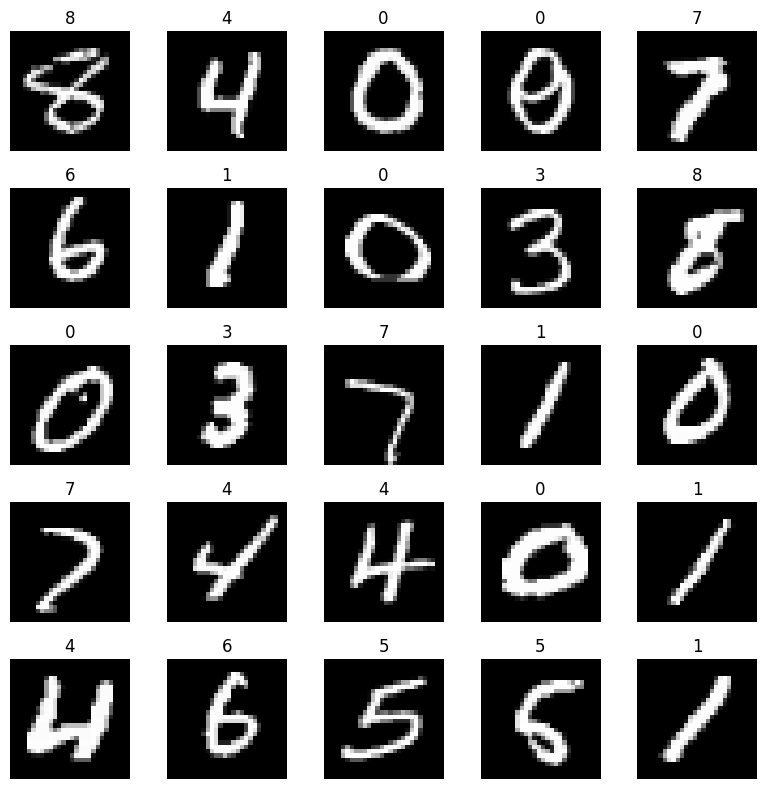

In [63]:
fig = plt.figure(figsize=(8,8))
for i, idx in enumerate(samples):
  # 한줄에 5개씩 5줄
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[idx], cmap="gray")
  plt.axis('off')
  plt.title(y_train[idx])
plt.tight_layout()
plt.show()

In [64]:
# 짤려서 안보이게
np.set_printoptions(linewidth=np.inf)

X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39, 148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221, 253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253, 253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253, 195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [65]:
pd.Series(y_train).value_counts()

,count
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842
5,5421


##3.데이터분리
- 검증용 데이터 분리

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [67]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [68]:
y_train.shape

(48000,)

###스케일
-min_max Scaling

In [69]:
# min-max scaler
# 이미지를 255로 나누는 방법
# 공식도 있긴 함
# 속도가 빠름

X_train_s = X_train.astype('float32')/255.
X_val_s = X_val.astype('float32')/255.

# robust scaler
# 이미지에 이상치가 있을 것 같을 때

###원핫인코딩

In [71]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

In [72]:
y_train_o[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

##4.모델 만들기

In [73]:
X_train_s.shape

(48000, 28, 28)

In [74]:
X_train_s.shape, y_train_o.shape

((48000, 28, 28), (48000, 10))

In [75]:
# 이미지 데이터를 일차원으로 바꿔서 넣어야 함
X_train_s = X_train_s.reshape(-1, 28*28)
X_train_s.shape

(48000, 784)

In [76]:
# 여기서 -1는 자동으로 계산해달라는 의미
X_val_s = X_val_s.reshape(-1, 28*28)
X_val_s.shape

(12000, 784)

In [77]:
from keras import layers

# 뉴럴 네트워크는 데이터를 일차원으로 집어 넣어야 함
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=16, activation='relu'),
    # 출력
    # 다중분류니까 softmax
    layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,818 (100.85 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# 아담의 기본 파라미터가 마음에 안든다면 객체를 따로 만들면 됨
# adam = keras.optimizers.Adam(learning_rate=0.0001)

In [79]:
# 심화될수록 바꿀 수 있는게 없는지 확인

model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [81]:
epochs = 15
batch_size = 32

history = model.fit(X_train_s, y_train_o,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data = (X_val_s, y_val_o)
)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.9826 - loss: 0.0554 - val_acc: 0.9641 - val_loss: 0.1258
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9851 - loss: 0.0507 - val_acc: 0.9655 - val_loss: 0.1284
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9867 - loss: 0.0429 - val_acc: 0.9626 - val_loss: 0.1370
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9869 - loss: 0.0429 - val_acc: 0.9639 - val_loss: 0.1320
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9872 - loss: 0.0396 - val_acc: 0.9641 - val_loss: 0.1409
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.9885 - loss: 0.0372 - val_acc: 0.9628 - val_loss: 0.1484
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9888 - loss: 0.0342 - val_acc: 0.9612 - val_loss: 0.1562
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9888 - loss: 0.0337 - val_acc: 0.9628 - val_loss: 0.1539
Epoch 9/15
1500/1500 ━━━━━━━━━━━━━━━━━━━

In [82]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.plot(hist['epoch'], hist['loss'], label='train_loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
  plt.title('Loss Curve')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='train_acc')
  plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
  plt.title('acc Curve')
  plt.legend()

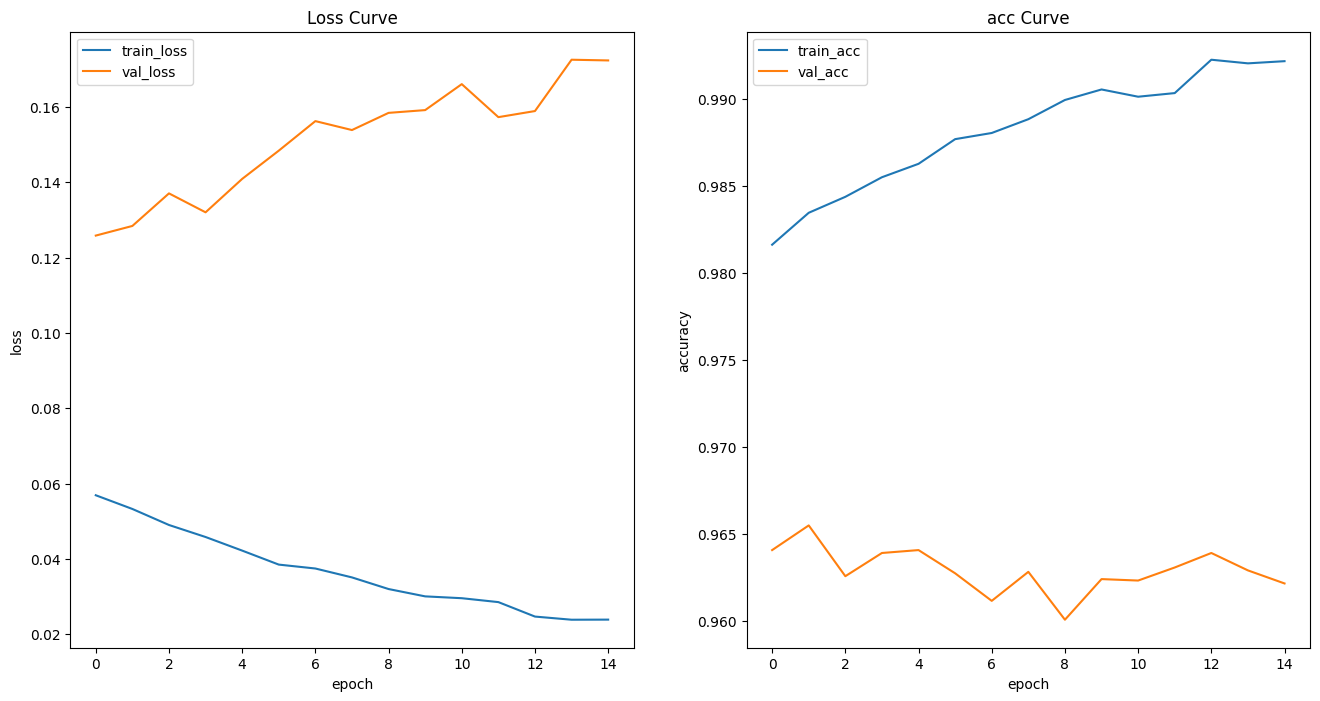

In [84]:
plot_history(history)

##5.테스트

In [83]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [85]:
# 스케일링
X_test_s = X_test.astype('float32')/255.

In [86]:
X_test_s.shape

(10000, 28, 28)

In [87]:
# 테스트도 쉐입 바꿔야 함
X_test_s = X_test_s.reshape(-1,28*28)
X_test_s.shape

(10000, 784)

In [88]:
y_pred = model.predict(X_test_s)
y_pred[:10]
# 순서대로 0~10 일 확률들

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[3.56698837e-11, 9.30765712e-15, 1.07599362e-06, 4.19808726e-04, 5.84478992e-16, 4.46153470e-09, 1.34797950e-20, 9.99579132e-01, 6.50426241e-12, 9.85948878e-10],
       [2.11211537e-09, 2.44305853e-10, 9.99998629e-01, 1.31122295e-06, 1.38150745e-24, 3.31077527e-11, 1.22241280e-16, 8.04183403e-17, 2.52895982e-10, 1.25656391e-22],
       [4.99957298e-10, 9.98568296e-01, 1.16416061e-07, 1.42968988e-08, 6.86706198e-06, 2.60591798e-10, 4.02604883e-08, 1.42437848e-03, 2.50552915e-07, 1.90221051e-11],
       [9.99999940e-01, 1.46316604e-17, 3.66236357e-08, 3.28896858e-16, 5.59407067e-13, 4.36279173e-11, 5.24764897e-14, 5.09562503e-10, 5.82167151e-18, 3.88148930e-10],
       [1.52427446e-10, 1.64666674e-13, 1.53262447e-09, 5.45469702e-12, 9.99469399e-01, 1.05510178e-09, 9.86686635e-11, 1.95491293e-06, 1.71120913e-08, 5.28662000e-04],
       [2.70409238e-12, 9.99853611e-01, 3.66396011e-11, 8.02646172e-10, 5.47259333e-07, 4.26681130e-12, 2.26138119e-11, 1.45763901e-04, 3.34940209e-09, 1.8

In [89]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [90]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [91]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred, average='macro')
  pre = precision_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print("acc:", acc)
  print("recall:", np.around(re, 4))
  print("precision:", np.around(pre, 4))
  print("f1:", np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc: 0.9637
recall: 0.9636
precision: 0.9634
f1: 0.9634


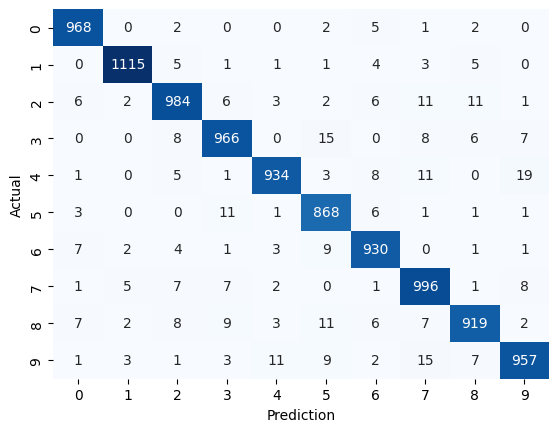

In [93]:
print_metrics(y_test, y_pred)

In [95]:
# 자주 쓰는 함수들 파이썬 라이브러리에 가져다 놓고 불러서 쓰면 됨

# 끝!!~!~